<a href="https://colab.research.google.com/github/rizky-gumelar/Bengkod-Data-Analyst/blob/main/Pertemuan_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Table of Contents

1. Mengumpulkan Data
2. Menelaah Data
3. Memvalidasi Data
4. Menetukan Object Data
5. Membersihkan Data
6. Mengkonstruksi Data
7. Menentukan Label Data
8. Membangun Model
9. Mengevaluasi Hasil Pemodelan
10. Optimasi Model Klasifikasi

### **Step 1: Mengumpulkan Data**

Dataset yang digunakan diambil dari sumber berikut: https://www.kaggle.com/competitions/titanic/data?select=train.csv File yang dipakai adalah "train.csv"

### **Step 2: Menelaah Data**

In [ ]:
# Mengimpor library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat dataset Titanic
file_path = 'titanic.csv'  # Pastikan file ini ada di direktori
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
df.head()

# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv('/content/drive/MyDrive/dataset/fetal_health.csv')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### **Step 3: Validasi Data**

CEK APAKAH ADA MISSING VALUE

In [ ]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


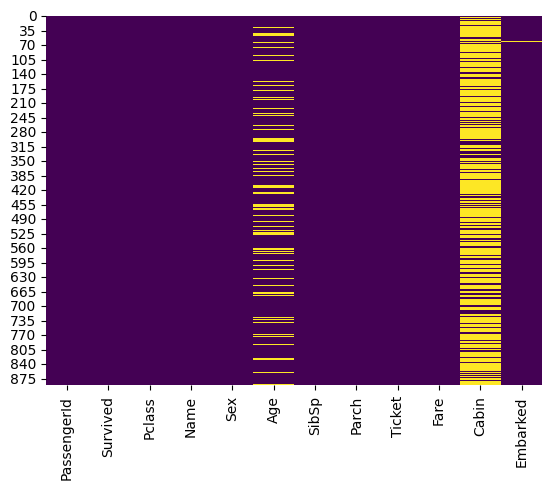

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

<ipython-input-13-5917150e6f68>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, hue=None, x="Survived",palette=colours, legend=False)
<ipython-input-13-5917150e6f68>:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data= df, hue=None, x="Survived",palette=colours, legend=False)


<Axes: xlabel='Survived', ylabel='count'>

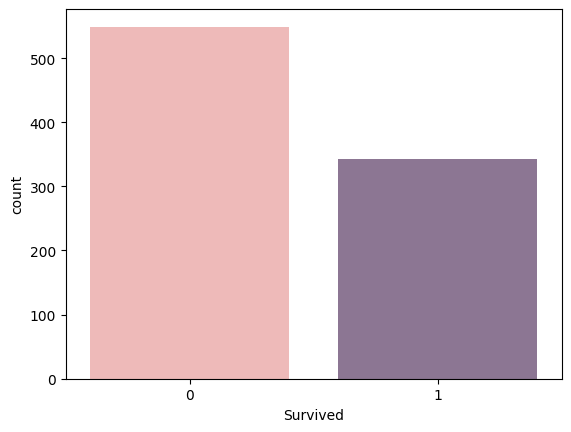

In [ ]:
colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= df, hue=None, x="Survived",palette=colours, legend=False)


Ada dua tipe data yaitu numerik dan kategorial

NUMERICAL DATA

In [ ]:
num = df.select_dtypes(include=['int64', 'float64'])
num

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


MEMVISUALISASIKAN KOLOM NUMERIKA

In [ ]:
correlation_matrix = num.corr()
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


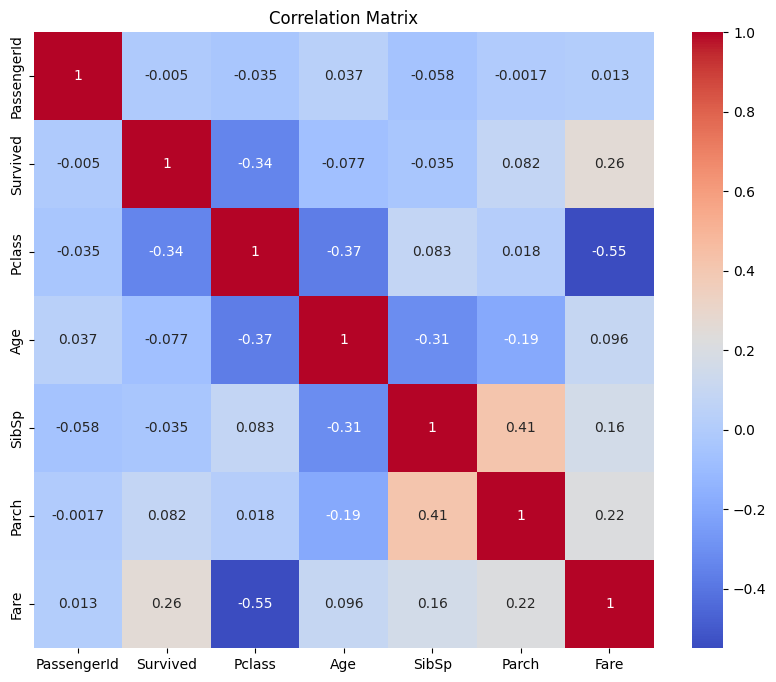

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Categorial DATA

In [ ]:
for col in df.columns:
    unique_vals = df[col].value_counts()
    print(f'{col} has {len(unique_vals)} unique values')

PassengerId has 891 unique values
Survived has 2 unique values
Pclass has 3 unique values
Name has 891 unique values
Sex has 2 unique values
Age has 88 unique values
SibSp has 7 unique values
Parch has 7 unique values
Ticket has 681 unique values
Fare has 248 unique values
Cabin has 147 unique values
Embarked has 3 unique values


In [ ]:
cat = df[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]
cat

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S
...,...,...,...,...,...,...
886,0,2,male,0,0,S
887,1,1,female,0,0,S
888,0,3,female,1,2,S
889,1,1,male,0,0,C


### **Step 4: Menentukan Object Data**

In [ ]:
# Target: Survived (0 = Tidak Selamat, 1 = Selamat)
# Fitur potensial: Pclass, Sex, Age, SibSp, Parch, Fare, Embarked ....
# Fitur yang dijadikan input
X = df.drop(["Survived"], axis=1)

# Fitur yang dijadikan sebagai target
y = df["Survived"]

# Mengecek dimensi X dan y
X.shape, y.shape

((891, 11), (891,))

### **Step 5: Membersihkan Data**

Handling Missing Value

In [ ]:
# Mengisi missing values Embarked dengan median
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-20-814c853aea4b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
# Mengisi missing values Embarked dengan modus
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-21-226c0207b82e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [ ]:
# Menghapus kolom Name
df.drop(columns=['Name'], inplace=True)

In [ ]:
# Menghapus kolom Passengerid
df.drop(columns=['PassengerId'], inplace=True)

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

### **Step 6: Mengkonstruksi Data**

In [ ]:
# Mengisi nilai kosong
df['Age'].fillna(df['Age'].median(), inplace=True)  # Isi dengan median
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Isi dengan mode

# Mengubah data kategoris menjadi numerik
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Memilih fitur dan target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]  # Fitur
y = df['Survived']  # Target

<ipython-input-25-feed2d623710>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Isi dengan median
<ipython-input-25-feed2d623710>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

### **Step 7: Menentukan Label Data**

Survived: The target variable (0 = Died, 1 = Survived).

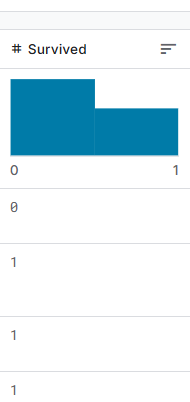

### **Step 8: Membangun Model**

1. Naive Bayes  
2. Logistic Regression
3. Decision Tree
4. K Nearest Neighbor
5. Random Forest
6. Support Vector Classifier

# **Penggunaan Beberapa Model dan Hasil Evaluasinya.**

In [ ]:
#Modul Scikit-Learn untuk Splitting Data
from sklearn.model_selection import train_test_split

#Model Klasifikasi
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
#Support Vector Machine (SVM)
from sklearn.svm import SVC
#XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

#Metrik Evaluasi
#Accuracy Score : Mengukur persentase prediksi yang benar dari total prediksi.
#Classification Report : Memberikan informasi tentang precision, recall, F1-score, dan support untuk setiap kelas.
#Confusion Matrix : Menampilkan matriks kesalahan (jumlah prediksi benar dan salah untuk tiap kelas).
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Melatih model Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred_gnb = gnb.predict(X_test)

# Menghitung dan menampilkan akurasi
accuracy = accuracy_score(y_test, y_pred_gnb)
print('Gaussian Accuracy:', round(accuracy, 2))

# Menampilkan laporan klasifikasi
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_gnb))

Gaussian Accuracy: 0.78

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



In [ ]:
#Membuat Model Logistic Regression
#Membuat instance model regresi logistik | Membuat instance model regresi logistik.
log_reg = LogisticRegression(max_iter=1000)
#Melatih Model | X_train: Fitur pada data pelatihan. | y_train: Label target pada data pelatihan.
log_reg.fit(X_train, y_train)
#Membuat Prediksi | X_test: Fitur pada data uji. | Hasil prediksi disimpan dalam variabel y_pred_log_reg.
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))

# Menampilkan laporan klasifikasi
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.8100558659217877

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
#Menggunakan algoritme Decision Tree Classifier untuk melakukan klasifikasi.
dt = DecisionTreeClassifier(random_state=42)
#Melatih Model | X_train: Fitur pada data pelatihan. | y_train: Label target pada data pelatihan.
dt.fit(X_train, y_train)
#Membuat Prediksi | X_test: Fitur pada data uji. | Hasil prediksi disimpan dalam variabel y_pred_dt.
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Menampilkan laporan klasifikasi
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7821229050279329

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



In [ ]:
# Membuat Model K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
#Melatih Model | X_train: Fitur pada data pelatihan. | y_train: Label target pada data pelatihan.
knn.fit(X_train, y_train)
#Membuat Prediksi | X_test: Fitur pada data uji. | Hasil prediksi disimpan dalam variabel y_pred_dt.
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

# Menampilkan laporan klasifikasi
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.7039106145251397

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.83      0.77       105
           1       0.68      0.53      0.60        74

    accuracy                           0.70       179
   macro avg       0.70      0.68      0.68       179
weighted avg       0.70      0.70      0.70       179



In [ ]:
#Model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
#Melatih Model | X_train: Fitur pada data pelatihan. | y_train: Label target pada data pelatihan.
rf.fit(X_train, y_train)
#Membuat Prediksi | X_test: Fitur pada data uji. | Hasil prediksi disimpan dalam variabel y_pred_rf.
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Menampilkan laporan klasifikasi
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_knn))

Random Forest Accuracy: 0.8156424581005587

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.83      0.77       105
           1       0.68      0.53      0.60        74

    accuracy                           0.70       179
   macro avg       0.70      0.68      0.68       179
weighted avg       0.70      0.70      0.70       179



In [ ]:
#Model SVC
svc = SVC(probability=True, random_state=42)
#Melatih Model | X_train: Fitur pada data pelatihan. | y_train: Label target pada data pelatihan.
svc.fit(X_train, y_train)
#Membuat Prediksi | X_test: Fitur pada data uji. | Hasil prediksi disimpan dalam variabel y_pred_svc.
y_pred_svc = svc.predict(X_test)

print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))

# Menampilkan laporan klasifikasi
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_svc))

SVC Accuracy: 0.659217877094972

Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.76      0.26      0.38        74

    accuracy                           0.66       179
   macro avg       0.70      0.60      0.57       179
weighted avg       0.69      0.66      0.61       179



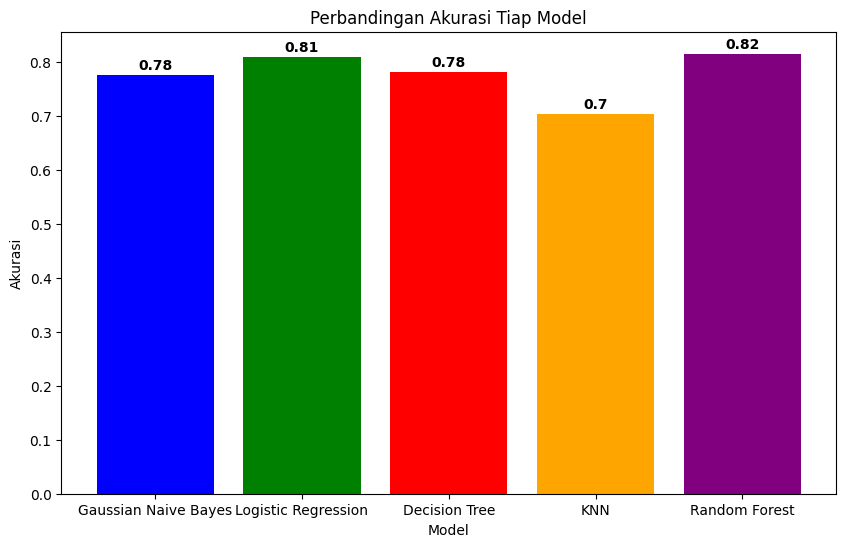

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ----> Calculate and store the accuracy scores <----
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Akurasi model yang sudah dihitung sebelumnya
models = ['Gaussian Naive Bayes', 'Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest']
accuracies = [accuracy_gnb, accuracy_log_reg, accuracy_dt, accuracy_knn, accuracy_rf]

# Membuat grafik bar
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'orange', 'purple'])

# Menambahkan label dan judul
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Tiap Model')

# Menampilkan nilai akurasi di atas batang
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, round(acc, 2), ha='center', color='black', fontweight='bold')

# Menampilkan grafik
plt.show()


# **10. Optimasi Model Klasifikasi**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Parameter grid untuk Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5
)
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}


In [ ]:
# Mendapatkan parameter terbaik dari grid search
best_params = grid_search.best_params_

# Membuat model RandomForest dengan parameter terbaik
best_rf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

# Melatih model dengan data pelatihan
best_rf.fit(X_train, y_train)

# Melakukan prediksi dengan model yang sudah dilatih
y_pred_best_rf = best_rf.predict(X_test)

# Menghitung akurasi model
from sklearn.metrics import accuracy_score, classification_report

# Menampilkan akurasi
print("Accuracy of Best Random Forest Model:", accuracy_score(y_test, y_pred_best_rf))

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_rf))


Accuracy of Best Random Forest Model: 0.8491620111731844

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       105
           1       0.86      0.76      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179

